In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from sklearn.cluster import KMeans
from k_means_constrained import KMeansConstrained

from kneed import KneeLocator
from math import ceil

In [2]:
# Lecture des fichiers 
path = "data"
dfs = dict()
for dir_item in os.listdir(path):
    dir_item_path = os.path.join(path, dir_item)
    print(dir_item_path)
    if os.path.isfile(dir_item_path) and dir_item_path[:8] == "data/Exp":
        dfs[dir_item] = pd.read_csv(dir_item_path, sep=";")
dfs.keys()

data/.ipynb_checkpoints
data/ExportBales.csv
data/README.md
data/ExportBales_2.csv
data/LICENSE
data/ExportBales_1.csv
data/ExportBales_4_1.csv
data/ExportBales_4.csv


dict_keys(['ExportBales.csv', 'ExportBales_2.csv', 'ExportBales_1.csv', 'ExportBales_4_1.csv', 'ExportBales_4.csv'])

In [3]:
dfs['ExportBales.csv'].head()

,_time,bale_info_bale_length,bale_info_bale_weight,bale_info_flake_count,bale_info_moisture,bale_info_tag_#,latitude,longitude,Colonne1,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,2021-07-31T08:09:17Z,3200,211000,255,110000,1,52.115374,11.078973,1.0,NaN,NaN,NaN,NaN
1,2021-07-31T08:10:13Z,1960,361000,44,110000,2,52.115187,11.082384,1.0,NaN,NaN,NaN,NaN
2,2021-07-31T08:11:02Z,2440,445000,40,110000,3,52.115149,11.080707,1.0,NaN,NaN,NaN,NaN
3,2021-07-31T08:12:04Z,2410,430000,39,110000,4,52.115188,11.079040,1.0,NaN,NaN,NaN,NaN
4,2021-07-31T08:12:50Z,2430,454000,38,110000,5,52.115411,11.079829,1.0,NaN,NaN,NaN,NaN


In [8]:
def clustering(data, path, size_trailer=5, humidite_lim=(0,0)) :
    # Option de garder une fourchette d'humidité précise
    X = data.copy()
    if humidite_lim != (0,0):
        X = X.loc[(X["bale_info_moisture"] <= humidite_lim[0]) & (X["bale_info_moisture"] >= humidite_lim[1])]
    if X.shape[0] == 0:
        print("Il n'y a pas de ballots avec cette humidité")
        return
    # nettoyage
    X.drop(inplace=True, columns=X.columns[-5:])
    X = X.loc[:,["latitude", "longitude"]]

    # Clustering
    size_max = min(size_trailer, X.shape[0])
    print("Taille remorque :", size_max)
    n_cl = ceil(X.shape[0]/size_trailer)
    kmeans = KMeansConstrained(n_clusters=n_cl, size_max=size_max, n_init=50, max_iter=300, tol=0.0001, random_state=42)
    kmeans.fit(X)
    print("Nombre de clusters :", n_cl, "inertie :", kmeans.inertia_)
    centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=X.columns)

    # Plot des données et des centres 
    plt.figure(figsize=(19,10))
    labels = kmeans.labels_
    plt.scatter(X["latitude"], X["longitude"], c=labels, cmap="Paired")
    plt.scatter(centers["latitude"], centers["longitude"], marker="*", c=list(centers.index), s=500, cmap="Paired")
    plt.axis('equal')
    plt.show()
    
    # Export des données avec leur cluster + centres 
    X["cluster"] = labels
    X.to_csv("cluster/"+path[:-4]+"_cl.csv", index=False)
    centers["cluster"] = centers.index
    centers.to_csv("cluster/"+path[:-4]+"_centers.csv", index=False)

ExportBales.csv
695
139
Taille remorque : 139
Nombre de clusters : 5 inertie : 749.1778383438766


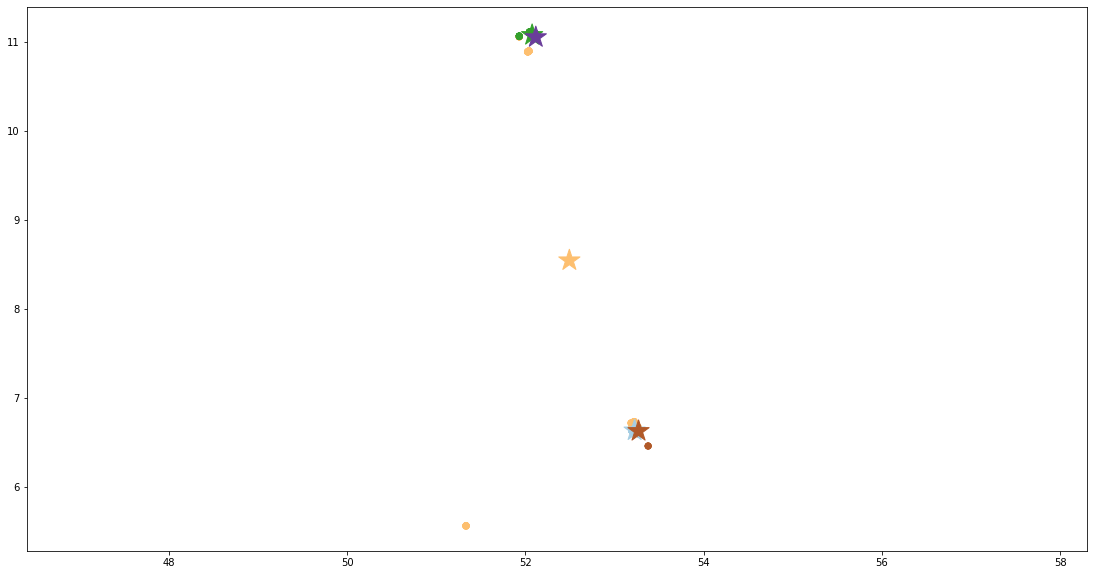

ExportBales_2.csv
18
5
Taille remorque : 5
Nombre de clusters : 4 inertie : 1.489601157251205e-06


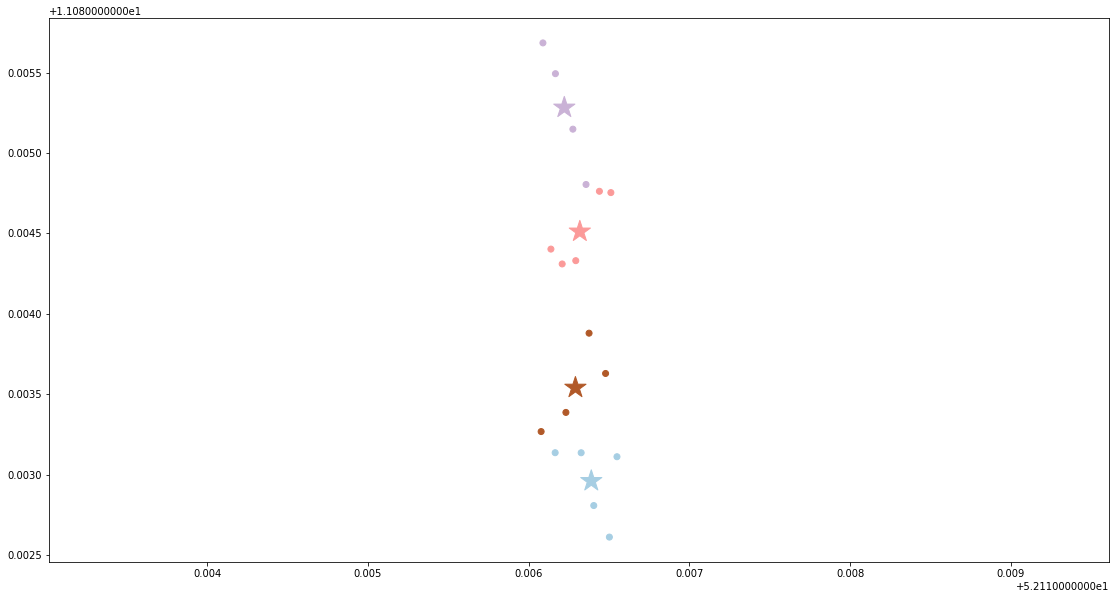

ExportBales_1.csv
18
5
Taille remorque : 5
Nombre de clusters : 4 inertie : 5.857043552499338e-06


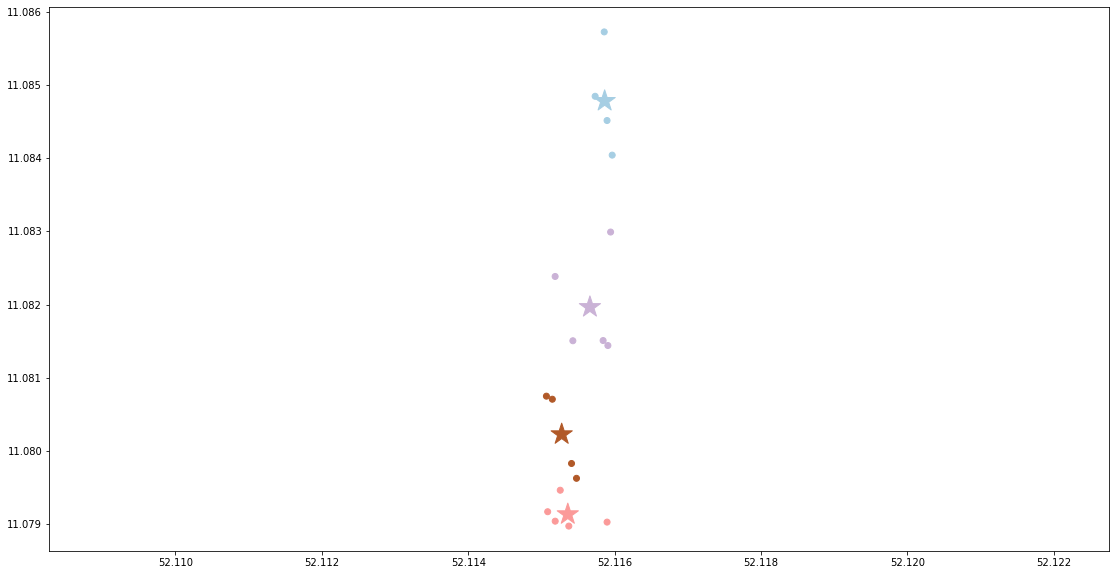

ExportBales_4_1.csv
46
9
Taille remorque : 9
Nombre de clusters : 6 inertie : 5.648274277989831e-06


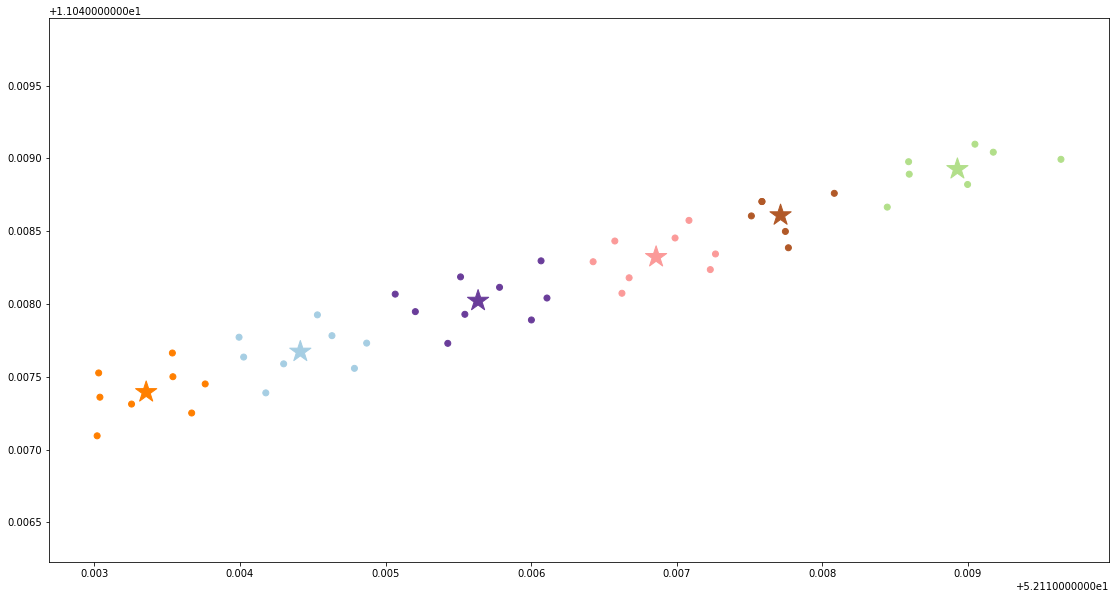

ExportBales_4.csv
14
5
Taille remorque : 5
Nombre de clusters : 3 inertie : 2.057840513381198e-05


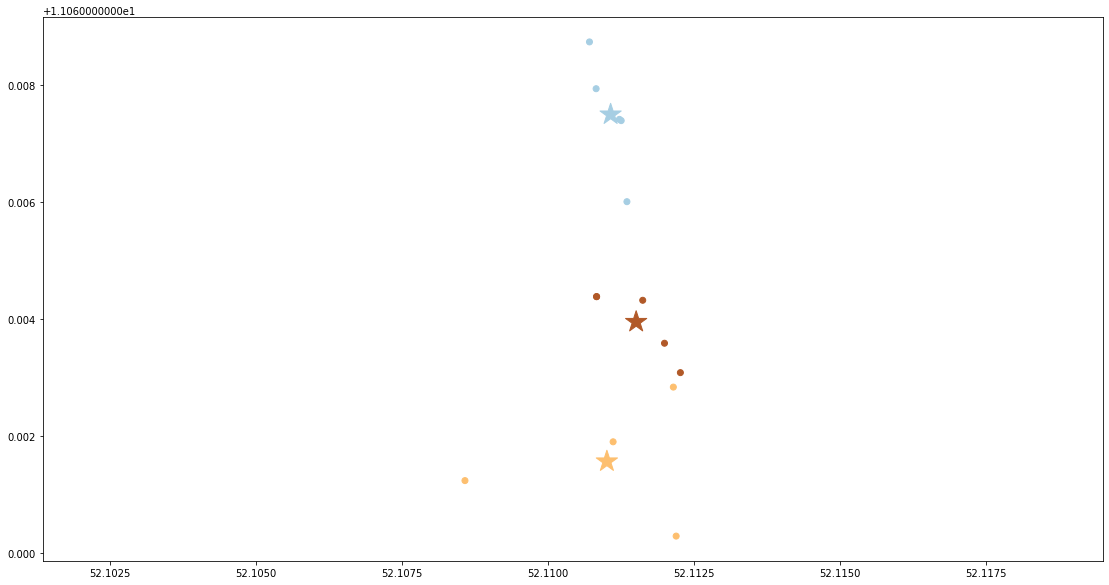

In [5]:
for key in dfs.keys():
    print(key)
    df = dfs[key]
    print(df.shape[0])
    taille_remorque = max(df.shape[0]//5, 5)
    print(taille_remorque)
    clustering(dfs[key], key, size_trailer=taille_remorque)

In [6]:
for key in dfs.keys():
    print(dfs[key]["bale_info_moisture"].unique())

[110000]
[110000]
[110000]
[110000]
[110000]


In [9]:
clustering(dfs['ExportBales.csv'], 'ExportBales.csv', size_trailer=30, humidite_lim=(0.15, 0.20))

Il n'y a pas de ballots avec cette humidité
